In [1]:
import pandas as pd
# we won't be doing anything with the image data so let's drop it
df = pd.read_csv(filepath_or_buffer='/kaggle/input/board-games/board_games.csv', index_col=['game_id']).drop(columns=['image', 'thumbnail'])
df.head()

description  max_players  \
game_id                                                                   
1        Die Macher is a game about seven sequential po...            5   
2        Dragonmaster is a trick-taking card game based...            4   
3        Part of the Knizia tile-laying trilogy, Samura...            4   
4        When you see the triangular box and the luxuri...            4   
5        In Acquire, each player strategically invests ...            6   

         max_playtime  min_age  min_players  min_playtime            name  \
game_id                                                                     
1                 240       14            3           240      Die Macher   
2                  30       12            3            30    Dragonmaster   
3                  60       10            2            30         Samurai   
4                  60       12            2            60  Tal der Könige   
5                  90       12            3            90         Acquire   

         playing_time  year_published                       artist  \
game_id                                                              
1                 240            1986          Marcus Gschwendtner   
2                  30            1981                   Bob Pepper   
3                  60            1998              Franz Vohwinkel   
4                  60            1992                          NaN   
5                  90            1964  Scott Okumura,Peter Whitley   

                               category compilation               designer  \
game_id                                                                      
1        Economic,Negotiation,Political         NaN     Karl-Heinz Schmiel   
2                     Card Game,Fantasy         NaN  G. W. "Jerry" D'Arcey   
3            Abstract Strategy,Medieval         NaN          Reiner Knizia   
4                               Ancient         NaN      Christian Beierer   
5                              Economic         NaN            Sid Sackson   

        expansion                                             family  \
game_id                                                                
1             NaN         Country: Germany,Valley Games Classic Line   
2             NaN                                   Animals: Dragons   
3             NaN  Asian Theme,Country: Japan,Knizia tile-laying ...   
4             NaN             Country: Egypt,Promotional Board Games   
5             NaN                                3M Bookshelf Series   

                                                  mechanic  \
game_id                                                      
1        Area Control / Area Influence,Auction/Bidding,...   
2                                             Trick-taking   
3        Area Control / Area Influence,Hand Management,...   
4        Action Point Allowance System,Area Control / A...   
5             Hand Management,Stock Holding,Tile Placement   

                                                 publisher  average_rating  \
game_id                                                                      
1        Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...         7.66508   
2                                 E.S. Lowe,Milton Bradley         6.60815   
3        999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...         7.44119   
4                                                   KOSMOS         6.60675   
5        3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...         7.35830   

         users_rated  
game_id               
1               4498  
2                478  
3              12019  
4                314  
5              15195

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10532 entries, 1 to 216725
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   description     10532 non-null  object 
 1   max_players     10532 non-null  int64  
 2   max_playtime    10532 non-null  int64  
 3   min_age         10532 non-null  int64  
 4   min_players     10532 non-null  int64  
 5   min_playtime    10532 non-null  int64  
 6   name            10532 non-null  object 
 7   playing_time    10532 non-null  int64  
 8   year_published  10532 non-null  int64  
 9   artist          7759 non-null   object 
 10  category        10438 non-null  object 
 11  compilation     410 non-null    object 
 12  designer        10406 non-null  object 
 13  expansion       2752 non-null   object 
 14  family          7724 non-null   object 
 15  mechanic        9582 non-null   object 
 16  publisher       10529 non-null  object 
 17  average_rating  10532 non-null  flo

In [3]:
from plotly.express import histogram
for column in [ 'max_players', 'max_playtime', 'min_age', 'min_players',
       'min_playtime',  'playing_time', 'year_published', 'average_rating', 'users_rated']:
    log_y = column in {'max_players', 'max_playtime', 'min_playtime', 'playing_time', 'users_rated'}
    histogram(data_frame=df, x=column, log_y=log_y, ).show()

In [4]:
from plotly.express import bar
bar(data_frame=df['category'].value_counts(normalize=True).to_frame().head(n=30).reset_index(), x='category', y='proportion',
   title='Top 30 categories')

The category data has a long tail, but almost all of the top games are in one of three categories.

In [5]:
from plotly.express import scatter
scatter(data_frame=df.sort_values(ascending=False, by='year_published'), x='users_rated', log_x=True, y='average_rating', 
        color='year_published', hover_name='name', height=800)

The data is so dominated by recent games we need to invert the row order by year to see older games at all.

(-0.5, 1199.5, 1199.5, -0.5)

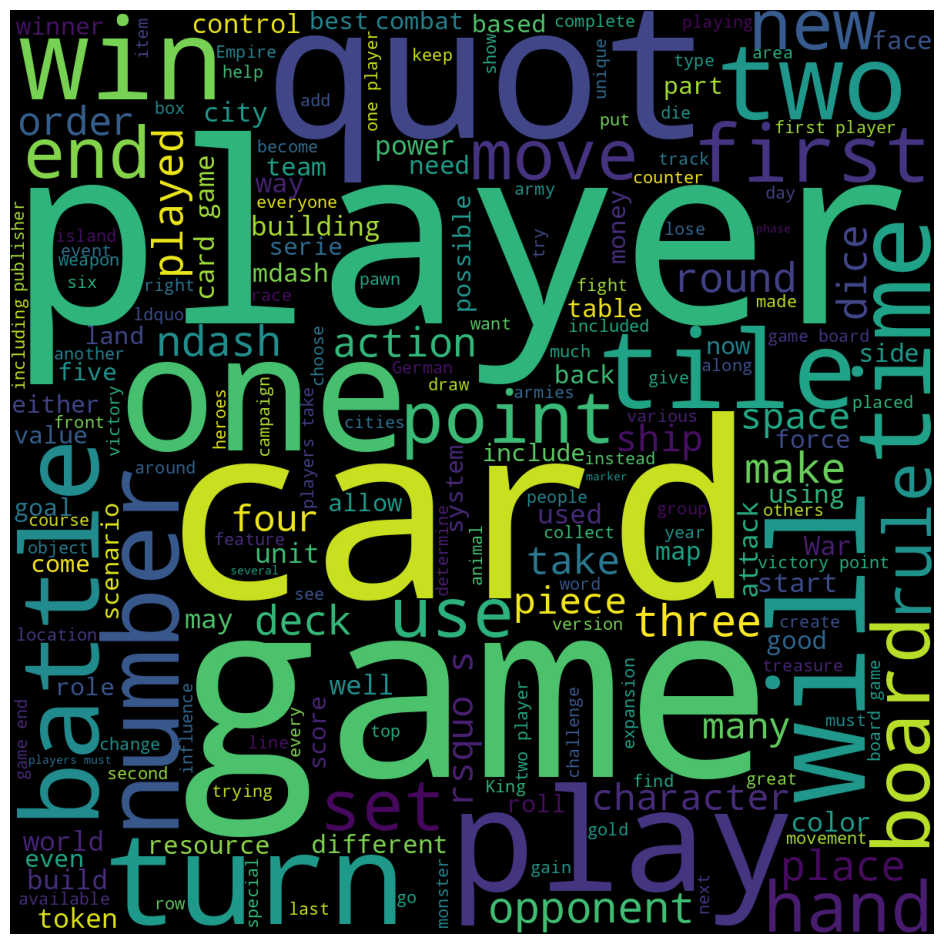

In [6]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['description'].values), ))
axis('off')

Is it kind of surprising that the descriptions are dominated by words describing game mechanics rather than subjects or themes? It was to me.

(-0.5, 1199.5, 1199.5, -0.5)

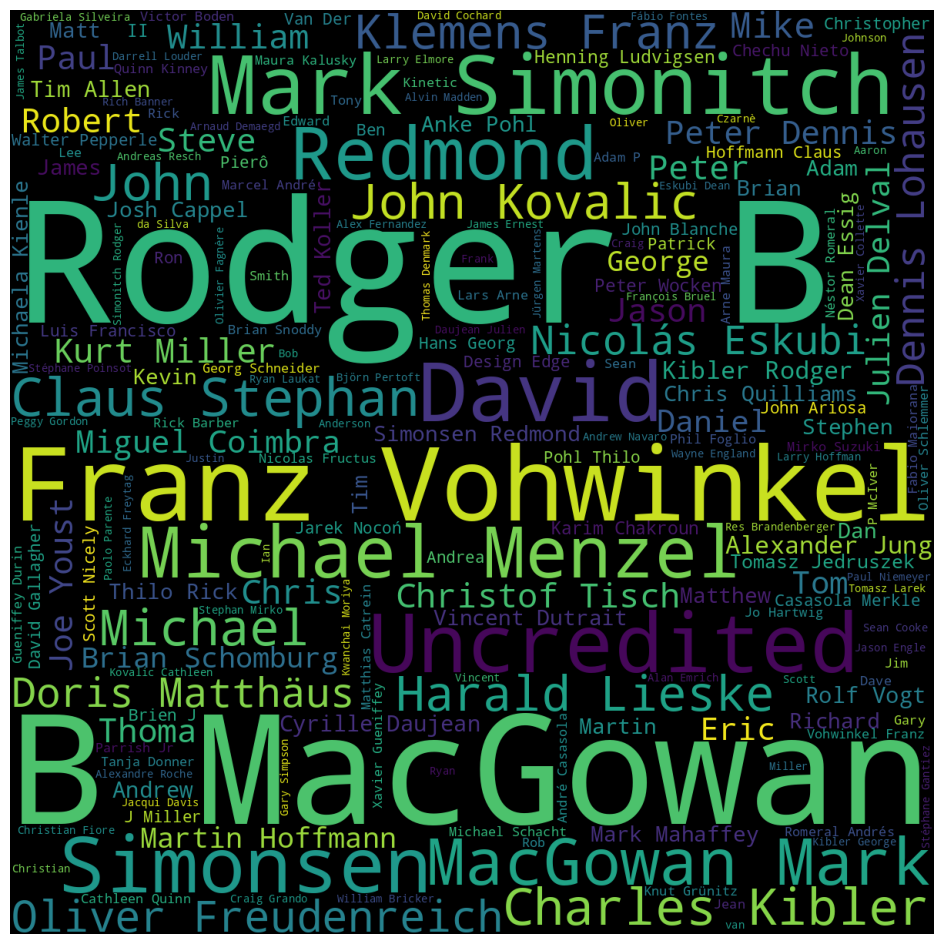

In [7]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['artist'].dropna().values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

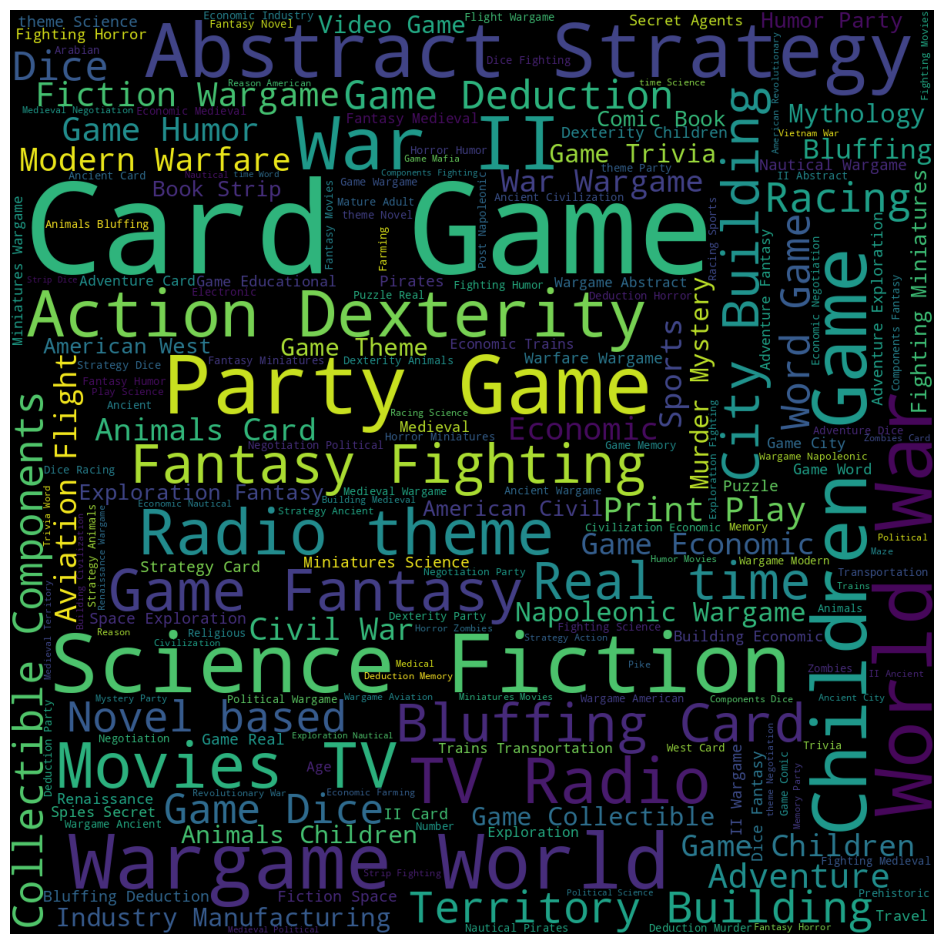

In [8]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['category'].dropna().values), ))
axis('off')

This might be more informative than the category bar chart or the description word cloud, partly because it separates out the technical kind of game (cards, dice, etc.) from the subject matter.

(-0.5, 1199.5, 1199.5, -0.5)

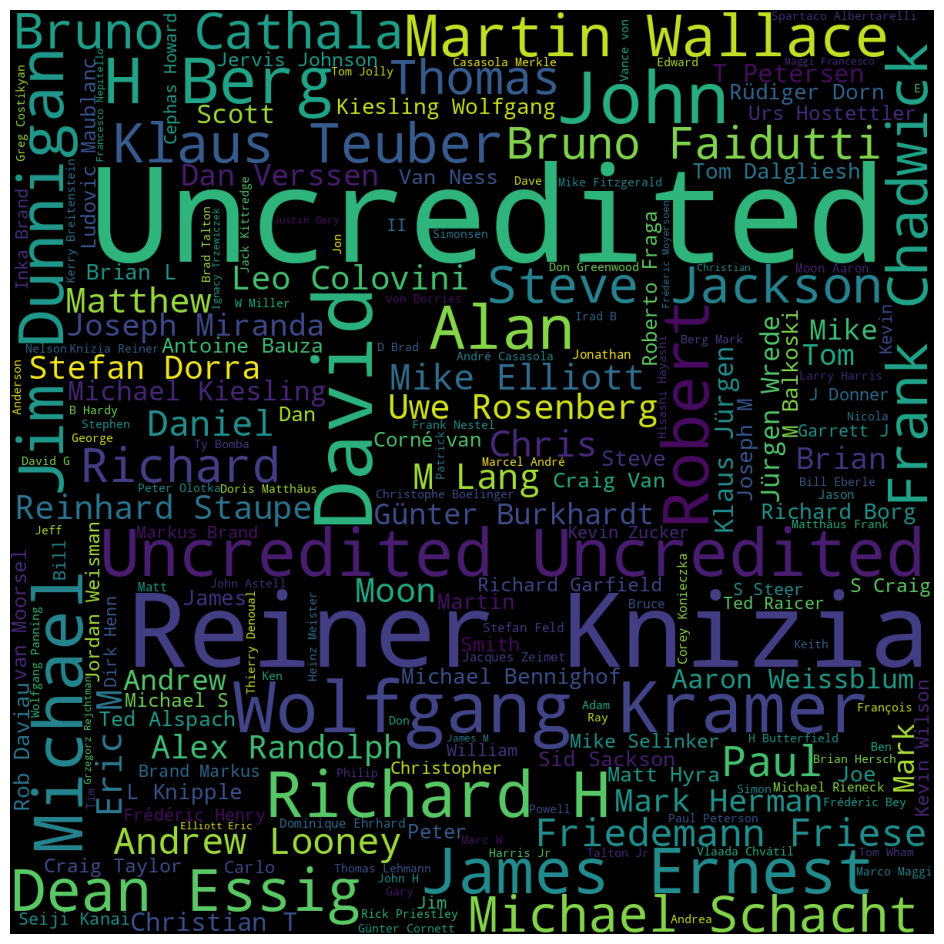

In [9]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['designer'].dropna().values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

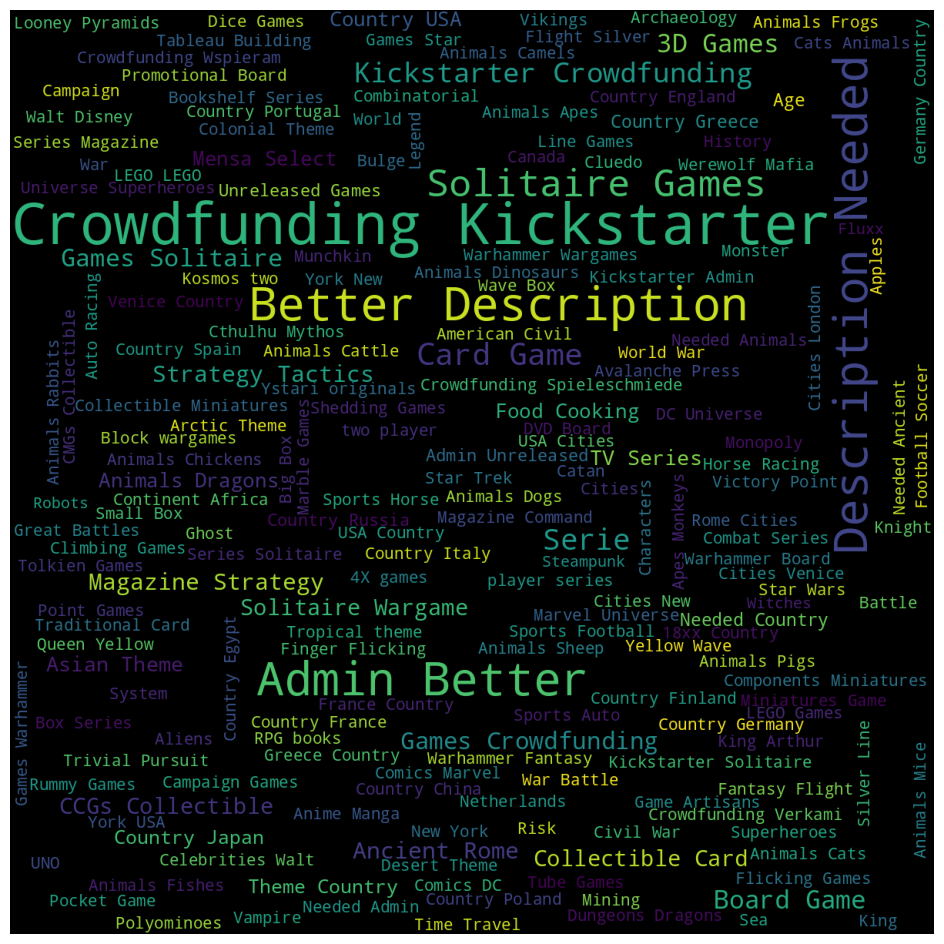

In [10]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['family'].dropna().values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

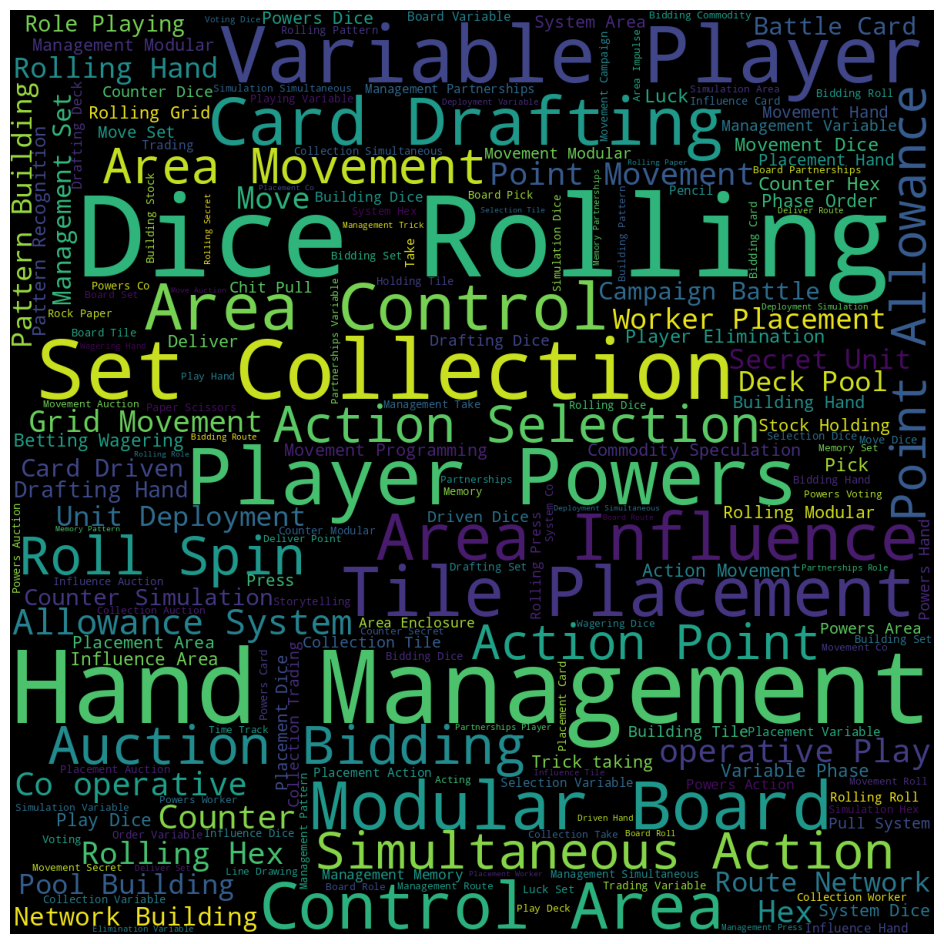

In [11]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['mechanic'].dropna().values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

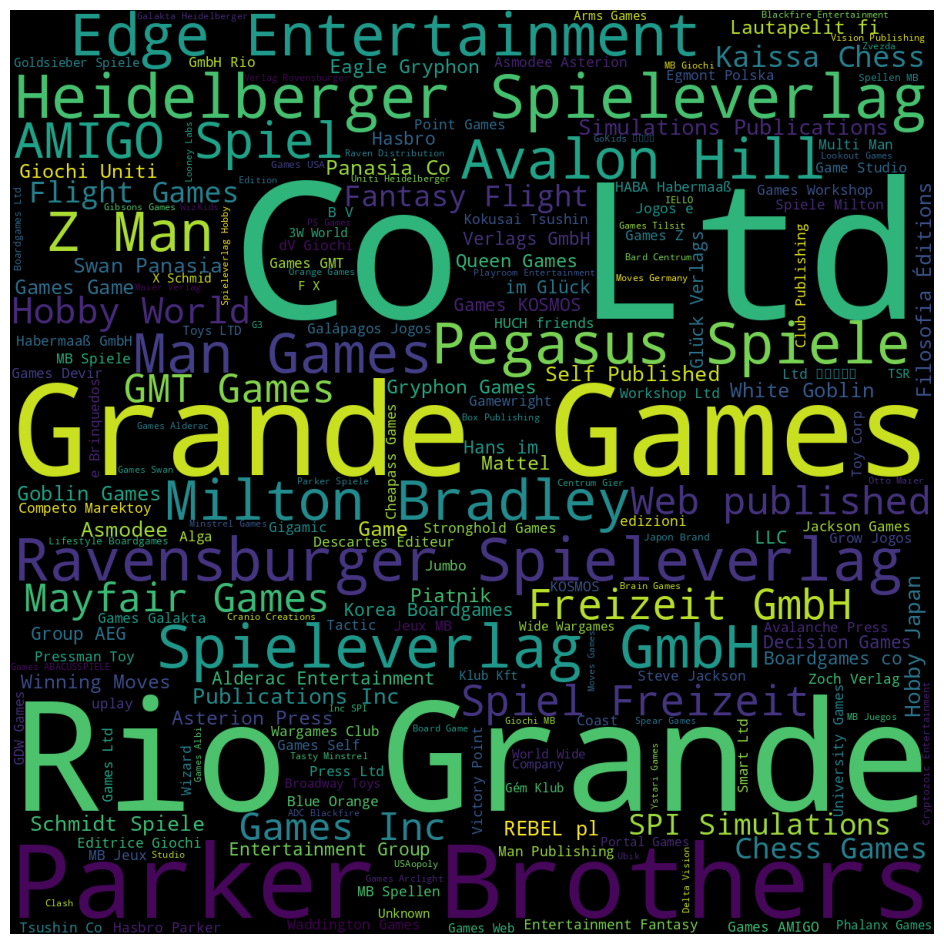

In [12]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['publisher'].dropna().values), ))
axis('off')